In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

In [3]:
# explore the dataframe
print(penguins_df.head())
print(penguins_df.info())
print(penguins_df.describe())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
       culmen_length_mm  culmen_depth_mm

In [4]:
# checking for missing values
print(penguins_df.isnull().sum())

# drop rows with missing values
penguins_df.dropna(inplace=True)

# check for missing values again
print("the sum of the null values", penguins_df.isnull().sum())
print(penguins_df.info()) # check the info of the dataframe again

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
the sum of the null values culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB
None


C:\Users\Ram\AppData\Local\Temp\ipykernel_15996\2556155100.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=penguins_df, palette='viridis')


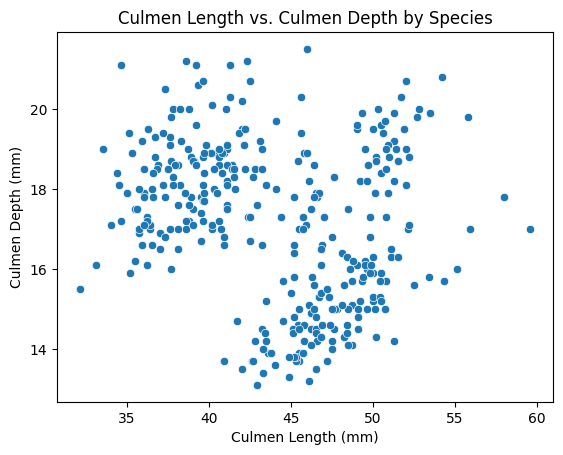

In [5]:
# data visualization
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=penguins_df, palette='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs. Culmen Depth by Species')
plt.show()

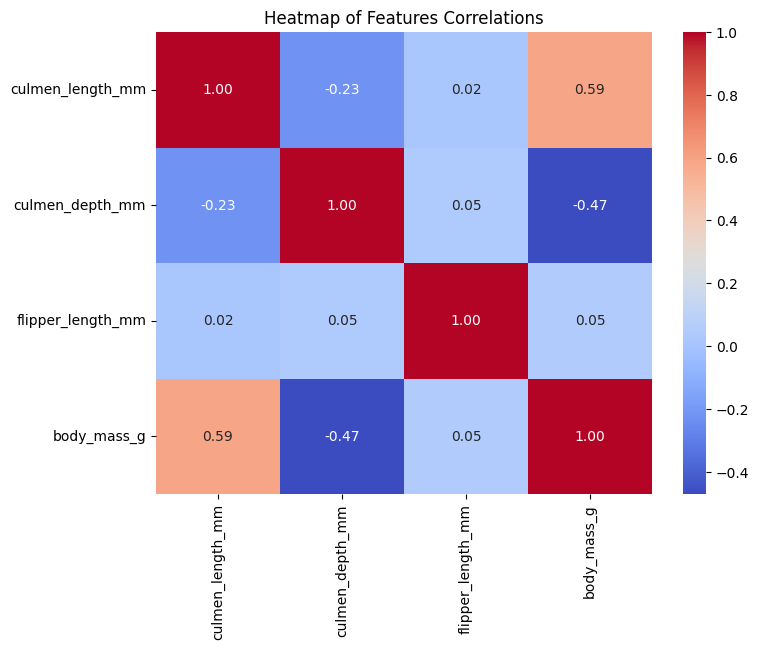

Text(0.5, 1.0, 'Pair plot by body_mass_g')

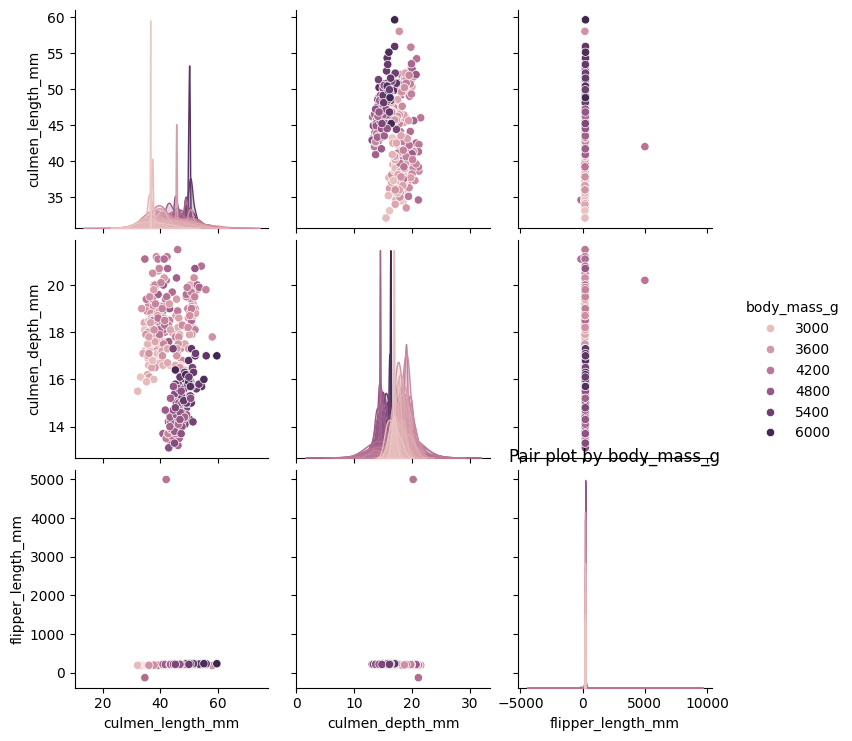

In [8]:
# visualize the data in df
plt.figure(figsize=(8, 6))
corr = penguins_df.drop("sex", axis=True).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Features Correlations')
plt.show()

# use the pair plot to
sns.pairplot(penguins_df, hue= 'body_mass_g')
plt.title("Pair plot by body_mass_g")

In [6]:
# # change the type of the sex col into category
# penguins_df["sex"] = penguins_df["sex"].astype("category")

# # encode the sex col
# sex_dummies = pd.get_dummies(penguins_df["sex"], dtype="int")
# penguins_df = pd.concat([penguins_df, sex_dummies], axis=1)
# print(penguins_df.head())
# print(penguins_df.info())

In [11]:
# Make the dummy variables 
penguins_df_dum = pd.get_dummies(penguins_df, dtype= 'int')
print(penguins_df_dum.head())
penguins_df.drop("sex_.", axis=0, inplace=True)
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_.  \
0              39.1             18.7              181.0       3750.0      0   
1              39.5             17.4              186.0       3800.0      0   
2              40.3             18.0              195.0       3250.0      0   
4              36.7             19.3              193.0       3450.0      0   
5              39.3             20.6              190.0       3650.0      0   

   sex_FEMALE  sex_MALE  
0           0         1  
1           1         0  
2           1         0  
4           1         0  
5           0         1  


KeyError: "['sex_.'] not found in axis"